In [1]:
import numpy as np
import pandas as pd
import simple_pid as pid

In [2]:
def simple_model(u,step):
    if not hasattr(model, "y"):
        model.y = 0 #wartosc w chwili n-1 
    T = 1
    K = 2
    y = model.y + step*(K*u - model.y)/T
    #print("y = {}, prev y ={}".format(y,model.y))
    model.y = y
    return y

step = 0.01

In [47]:
synaptic_weights = [-686.96163228, -699.73852229, -704.973159] 

def sigmoid(x):
        #applying the sigmoid function
        return 1 / (1 + np.exp(-x))

def think(inputs):
    #passing the inputs via the neuron to get output
    #converting values to floats

    output = sigmoid(np.dot(inputs, synaptic_weights))
    return output

In [51]:
regulator1 = pid.PID()
regulator2 = pid.PID()
regulator3 = pid.PID()

regulator1.sample_time = step  # Update every 0.01 seconds
regulator2.sample_time = step  # Update every 0.01 seconds
regulator3.sample_time = step  # Update every 0.01 seconds


regulator1.setpoint = 0.0152239
regulator2.setpoint = 0.0142925
regulator3.setpoint = 0.0142925

regulator1.tunings = (0.05, 0.5, 0.04)
regulator1.output_limits = (0,1)
regulator2.tunings = (0.03, 0.4, 0.04)
regulator2.output_limits = (0,1)
regulator3.tunings = (0.02, 0.2, 0.04)
regulator3.output_limits = (0,1)



u_pd = regulator1(0)
u_p  = regulator2(0)
u_t  = regulator3(0)

value = think([u_pd,u_p,u_t])

data = pd.DataFrame(columns=['t','u_pd','u_p','u_t','value'])
for t in np.arange(0,5,step):
    u_pd = regulator1(value)
    u_p  = regulator2(value)
    u_t  = regulator3(value)
    inputs = [u_pd,u_p,u_t]
    print(inputs) 
    value = think(inputs)
    data = data.append({'t':t, 'u_pd':u_pd, 'u_p':u_p , 'u_t': u_t, 'value':value},  ignore_index=True)

[0.0007660524288631667, 0.00043232707501875703, 0.0002876192656996005]
[0.0007660524288631667, 0.00043232707501875703, 0.0002876192656996005]
[0.0007660524288631667, 0.00043232707501875703, 0.0002876192656996005]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 

In [44]:
think([0.6857607272504538, 0.6857369995013869, 0.6857159589999355])

3.3411723692264844e-138

In [45]:
regulator1

PID(Kp=0.5, Ki=0.5, Kd=0.04, setpoint=0.0152239, sample_time=0.01, output_limits=(0, 1), auto_mode=True, proportional_on_measurement=False,error_map=None)

<AxesSubplot:xlabel='t'>

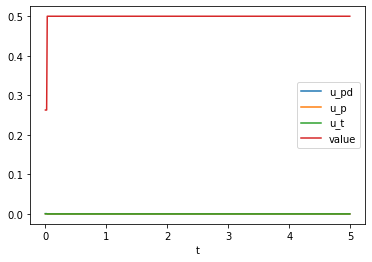

In [52]:
data.set_index('t').plot()

In [ ]:
pd.DataFrame([{'y' : model(1,step), 't' : t} for t in np.arange(0,5,step)]).set_index('t').plot()